<a href="https://colab.research.google.com/github/bijuangalees/A-quick-overview-of-ResNet-models/blob/main/Food_Recognition_2022_MMDetection_Baseline_Training_%2B_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)

# 🍕 Food Recognition Benchmark


# Problem Statement
Detecting & Segmenting various kinds of food from an image. For ex. Someone got into new restaurent and get a food that he has never seen, well our DL model is in rescue, so our DL model will help indentifying which food it is from the class our model is being trained on!    

<img src="https://i.imgur.com/zS2Nbf0.png" width="300" />


# Dataset
We will be using data from Food Recognition Challenge - A benchmark for image-based food recognition challange which is running since 2020.


https://www.aicrowd.com/challenges/food-recognition-benchmark-2022#datasets

We have a total of **39k training images** with **3k validation set** and **4k public-testing set**. All the images are RGB and annotations exist in **MS-COCO format**.

<img src="https://lh5.googleusercontent.com/iySoTCAHFoEKxjvzELzCJKbZaTG2TzMcjuBxAlBVGupjkpE_XI1xNPnE71UIBthTu9_fZ4A1tz-ArABpI0DD2ZeF87qHPccRogEezd-UbhkQgZcQBYCE1HMeDusaKtj8ClCWjw-p">

<small>Reference: This notebook is based on the notebook created by [Shraddhaa Mohan](https://www.linkedin.com/in/shraddhaa-mohan-20a008185/) and [Rohit Midha](https://www.linkedin.com/in/rohitmidha/) for previous iteration of the challenge. You can find the [original notebook here](https://colab.research.google.com/drive/1vKAQ9D3dgubbBc2jGYGQB0-lZXlT8hTh#scrollTo=Dha6_NXmIzB9).</small>

In this Notebook, we will first do an analysis of the Food Recognition Dataset and then use maskrcnn for training on the dataset.

## The Challenge


*   Given Images of Food, we are asked to provide Instance Segmentation over the images for the food items.
*   The Training Data is provided in the COCO format, making it simpler to load with pre-available COCO data processors in popular libraries.
*   The test set provided in the public dataset is similar to Validation set, but with no annotations.
*   The test set after submission is much larger and contains private images upon which every submission is evaluated.
*   Pariticipants have to submit their trained model along with trained weights. Immediately after the submission the AICrowd Grader picks up the submitted model and produces inference on the private test set using Cloud GPUs.
*   This requires Users to structure their repositories and follow a provided paradigm for submission.


## The Notebook
> *  Installation of MMDetection
> *  Training a simple model with MMDetection
> *  Local Evaluation/Quick Submision using MMDetection
> * Active Submission using trained model


# GPU Check

Do a quick check if you have been allocated a GPU.

If this command fails for you, please go to `Runtime` -> `Change Runtime Type` -> `Hardware Accelerator` -> `GPU`

In [ ]:
!nvidia-smi

Tue Feb  8 14:10:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Setting our Workspace 💼

In this section we will be downloading our dataset, unzipping it & downloading mmdetection repo/library and importing all libraries that we will be using

In [ ]:
# Login to AIcrowd
!pip install aicrowd-cli > /dev/null
!aicrowd login

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Please login here: https://api.aicrowd.com/auth/1CKFukIf1WjTbKWuxmq7upTdCwiL5O4Kez4IP4EVrAE
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://api.aicrowd.com/auth/1CKFukIf1WjTbKWuxmq7upTdCwiL5O4Kez4IP4EVrAE'
API Key valid
Gitlab access token valid
Saved details success

In [ ]:
# List dataset for this challenge
!aicrowd dataset list -c food-recognition-benchmark-2022

# Download dataset
!aicrowd dataset download -c food-recognition-benchmark-2022

                          Datasets for challenge #962                           
┌───┬────────────────────────────────┬────────────────────────────────┬────────┐
│ # │ Title                          │ Description                    │   Size │
├───┼────────────────────────────────┼────────────────────────────────┼────────┤
│ 0 │ public_validation_set_2.0.tar… │ Validation Dataset (contains   │    59M │
│   │                                │ 1000 images and 498            │        │
│   │                                │ categories, with annotations)  │        │
│ 1 │ public_test_release_2.0.tar.gz │ [Public] Testing Dataset       │   197M │
│   │                                │ (contains 3000 images and 498  │        │
│   │                                │ categories, without            │        │
│   │                                │ annotations)                   │        │
│ 2 │ public_training_set_release_2… │ Training Dataset (contains     │ 2.14GB │
│   │                       

In [ ]:
# Create data directory
!mkdir -p data/ data/train data/val data/test
!cp *test* data/test && cd data/test && echo "Extracting test dataset" && tar -xvf *test* > /dev/null
!cp *val* data/val && cd data/val && echo "Extracting val dataset" &&  tar -xvf *val* > /dev/null
!cp *train* data/train && cd data/train && echo "Extracting train dataset" &&  tar -xvf *train* > /dev/null

Extracting test dataset
Extracting val dataset
Extracting train dataset


## Mount the Google Drive

In [ ]:
#alternatively copy files from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

In [ ]:
import torch
TORCH_VERSION = torch.__version__.split("+")[0]
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

#we have used torch version 1.10.0 and cuda 11.1 as it is preinstalled in this colab version
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.
#don't forget to restart the runtime

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

!pip install Pillow
!pip uninstall pycocotools -y
!pip install -q git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI


torch:  1.10.0 ; cuda:  cu111
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 68.5 MB 141 kB/s 
     |████████████████████████████████| 190 kB 5.2 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 22983, done.
remote: Total 22983 (delta 0), reused 0 (delta 0), pack-reused 22983
Receiving objects: 100% (22983/22983), 25.77 MiB | 34.36 MiB/s, done.
Resolving deltas: 100% (16110/16110), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet
Found existing installation: pycocotools 2.0.4
Uninstalling pycocotools-2.0.4:
  Successfully uninstalled pycocotools-2.0.4


#### **Note:** Before continuing restart runtime

To restart runtime : `Runtime` > `Restart Runtime`

## Imports

In [ ]:
%cd /content/

#Directories present
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('data/'):
        print(dirname)
import os
import sys
sys.path.append("mmdetection")
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

/content
data/
data/val
data/val/images
data/test
data/test/images
data/train
data/train/images


So, the `data` directory is something like this:

<img src="https://images.aicrowd.com/uploads/ckeditor/pictures/674/content_carbon__3_.png" width="50%">

## Reading Data

In [ ]:
# For reading annotations file
import json
from pycocotools.coco import COCO

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "data/train/images/"

VAL_ANNOTATIONS_PATH = "data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "data/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=4.58s)
creating index...
index created!


In [ ]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)
train_annotations_data['annotations'][0]

{'area': 5059.0,
 'bbox': [39.5, 39.5, 167.0, 92.0],
 'category_id': 1352,
 'id': 184135,
 'image_id': 131094,
 'iscrowd': 0,
 'segmentation': [[115.0,
   206.5,
   98.0,
   204.5,
   74.5,
   182.0,
   65.0,
   167.5,
   47.5,
   156.0,
   39.5,
   137.0,
   39.5,
   130.0,
   51.0,
   118.5,
   62.00000000000001,
   112.5,
   76.0,
   113.5,
   121.5,
   151.0,
   130.5,
   169.0,
   131.5,
   185.0,
   128.5,
   195.0]]}

## Data Format 🔍

Our COCO data format is something like this -

```
"info": {...},
"categories": [...],
"images": [...],
"annotations": [...],
```

In which categories is like this
```
[
  {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
  {'id': 1157,
  'name': 'pear',
  'name_readable': 'Pear',
  'supercategory': 'food'},
  ...
  {'id': 1190,
  'name': 'peach',
  'name_readable': 'Peach',
  'supercategory': 'food'}
]
```

Info is empty ( not sure why )

images is like this

```
[
  {'file_name': '065537.jpg',
  'height': 464,
  'id': 65537,
  'width': 464},
  {'file_name': '065539.jpg',
  'height': 464,
  'id': 65539,
  'width': 464},
 ...
  {'file_name': '069900.jpg',
  'height': 391,
  'id': 69900,
  'width': 392},
]
```
Annotations is like this

```
{'area': 44320.0,
 'bbox': [86.5, 127.49999999999999, 286.0, 170.0],
 'category_id': 2578,
 'id': 102434,
 'image_id': 65537,
 'iscrowd': 0,
 'segmentation': [[235.99999999999997,
   372.5,
   169.0,
   372.5,
   ...
   368.5,
   264.0,
   371.5]]}
```


## Fixing the Data

In [ ]:
#fix dataset
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "/content/data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "/content/data/train/images/"

VAL_ANNOTATIONS_PATH = "/content/data/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "/content/data/val/images/"

# train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)



# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory, VERBOSE = False):
  for n, i in enumerate(tqdm((annotations['images']))):

      img = cv2.imread(directiory+i["file_name"])

      if img.shape[0] != i['height']:
          annotations['images'][n]['height'] = img.shape[0]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          if VERBOSE:
            print(i["file_name"])
            print(annotations['images'][n], img.shape)

  return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY)

with open('/content/data/train/new_ann.json', 'w') as f:
    json.dump(train_annotations_data, f)

val_annotations_data = fix_data(val_annotations_data, VAL_IMAGE_DIRECTIORY)

with open('/content/data/val/new_ann.json', 'w') as f:
    json.dump(val_annotations_data, f)

  0%|          | 0/39962 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Setting up hyperparameters

Modify the model configuration hyperparameters for our training

* Load the configuration files and modify them for our dataset.
* Set the desired hyperparameters as well
* Start training and logging

In [ ]:
# You can add more model configs like below.
MODELS_CONFIG = {
    'htc_without_semantic_r50_fpn_1x': {
        'config_file': 'configs/htc/htc_without_semantic_r50_fpn_1x_coco.py'
    }
}

# Pick the model you want to use
selected_model = 'htc_without_semantic_r50_fpn_1x' # chose any config you want from the MODELS_CONFIG

# Name of the config file.
config_file = MODELS_CONFIG[selected_model]['config_file']

config_fname = os.path.join('mmdetection', config_file)
assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
config_fname

'mmdetection/configs/htc/htc_without_semantic_r50_fpn_1x_coco.py'

In [ ]:
%cd /content/

# Explore classes to predict, we will use this while editing the config
annotation_path = os.path.join("data", "train/new_ann.json")
json_file = open(annotation_path)
coco = json.load(json_file)
print(coco["categories"])
classes_names = [category["name"] for category in coco["categories"]]
print(classes_names)

/content
[{'id': 1565, 'name': 'bread-wholemeal', 'name_readable': 'Bread, wholemeal', 'supercategory': 'food'}, {'id': 2099, 'name': 'jam', 'name_readable': 'Jam', 'supercategory': 'food'}, {'id': 2578, 'name': 'water', 'name_readable': 'Water', 'supercategory': 'food'}, {'id': 1556, 'name': 'bread-sourdough', 'name_readable': 'Bread, sourdough', 'supercategory': 'food'}, {'id': 1154, 'name': 'banana', 'name_readable': 'Banana', 'supercategory': 'food'}, {'id': 1352, 'name': 'soft-cheese', 'name_readable': 'Soft cheese', 'supercategory': 'food'}, {'id': 1893, 'name': 'ham-raw', 'name_readable': 'Ham, raw', 'supercategory': 'food'}, {'id': 1310, 'name': 'hard-cheese', 'name_readable': 'Hard cheese', 'supercategory': 'food'}, {'id': 1264, 'name': 'cottage-cheese', 'name_readable': 'Cottage cheese', 'supercategory': 'food'}, {'id': 1536, 'name': 'bread-half-white', 'name_readable': 'Bread, half white', 'supercategory': 'food'}, {'id': 2512, 'name': 'coffee-with-caffeine', 'name_readable'

In [ ]:
##Here is the raw config file, we will make changes to this to suit our purpose
!cat {config_fname}

_base_ = [
    '../_base_/datasets/coco_instance.py',
    '../_base_/schedules/schedule_1x.py', '../_base_/default_runtime.py'
]
# model settings
model = dict(
    type='HybridTaskCascade',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0,

### Edit config

We will edit the config to be suited to the food dataset, there are a lot of parameters other than the ones we have changed below that one can edit in the existing config file that might lead to a better score. We leave that upto you, do feel free to explore documentation for [mmdetection](https://github.com/open-mmlab/mmdetection/tree/master/docs).

**Note:** Instead of using regular expressions to edit the existing file, feel free to download the config file and edit it using the text editor of your choice and then reupload the same and have the variable config_fname point to the same

In [ ]:
import re
fname = config_fname
with open(fname) as f:
    s = f.read()

    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(classes_names)), s)

with open(fname, 'w') as f:
    f.write(s)
#lets check if the changes have been updated
!cat {config_fname}

_base_ = [
    '../_base_/datasets/coco_instance.py',
    '../_base_/schedules/schedule_1x.py', '../_base_/default_runtime.py'
]
# model settings
model = dict(
    type='HybridTaskCascade',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0,

In [ ]:
import re
fname2 = '/content/mmdetection/configs/_base_/datasets/coco_instance.py'

with open(fname2) as f:
    s = f.read()
    s = re.sub("data_root = 'data/coco/'",
                "data_root = 'data/'", s)
    s = re.sub("annotations/instances_train2017.json",
                "train/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("annotations/instances_val2017.json",
                "val/new_ann.json", s)
    s = re.sub("train2017", "train/images", s)
    s = re.sub("val2017", "val/images", s)
    s = re.sub("workers_per_gpu=2","workers_per_gpu=0",s)
    s = re.sub("samples_per_gpu=2","samples_per_gpu=6",s)


with open(fname2, 'w') as f:
    f.write(s)

#to check if the changes have been updated
# !cat {fname2}


total_epochs = 22
fname = '/content/mmdetection/configs/_base_/schedules/schedule_1x.py'
with open(fname) as f:
    s = f.read()
    s = re.sub('max_epochs=\d+',
               'max_epochs={}'.format(total_epochs), s)
    s = re.sub("lr=0.02","lr=0.0025",s)  #need to change lr to 0.0025 since we are working with only 1 gpu
with open(fname, 'w') as f:
    f.write(s)

In [ ]:
#@title Don't forget to run this cell, Modify coco dataset mmdet file (set classes list) { display-mode: "form" }
%%writefile /content/mmdetection/mmdet/datasets/coco.py


# Copyright (c) OpenMMLab. All rights reserved.
import contextlib
import io
import itertools
import logging
import os.path as osp
import tempfile
import warnings
from collections import OrderedDict

import mmcv
import numpy as np
from mmcv.utils import print_log
from terminaltables import AsciiTable

from mmdet.core import eval_recalls
from .api_wrappers import COCO, COCOeval
from .builder import DATASETS
from .custom import CustomDataset


@DATASETS.register_module()
class CocoDataset(CustomDataset):

    CLASSES = ('bread-wholemeal', 'jam', 'water', 'bread-sourdough', 'banana', 'soft-cheese', 'ham-raw', 'hard-cheese', 'cottage-cheese', 'bread-half-white', 'coffee-with-caffeine', 'fruit-salad', 'pancakes', 'tea', 'salmon-smoked', 'avocado', 'spring-onion-scallion', 'ristretto-with-caffeine', 'ham', 'egg', 'bacon-frying', 'chips-french-fries', 'juice-apple', 'chicken', 'tomato-raw', 'broccoli', 'shrimp-boiled', 'beetroot-steamed-without-addition-of-salt', 'carrot-raw', 'chickpeas', 'french-salad-dressing', 'pasta-hornli', 'sauce-cream', 'meat-balls', 'pasta', 'tomato-sauce', 'cheese', 'pear', 'cashew-nut', 'almonds', 'lentils', 'mixed-vegetables', 'peanut-butter', 'apple', 'blueberries', 'cucumber', 'cocoa-powder', 'greek-yaourt-yahourt-yogourt-ou-yoghourt', 'maple-syrup-concentrate', 'buckwheat-grain-peeled', 'butter', 'herbal-tea', 'mayonnaise', 'soup-vegetable', 'wine-red', 'wine-white', 'green-bean-steamed-without-addition-of-salt', 'sausage', 'pizza-margherita-baked', 'salami', 'mushroom', 'bread-meat-substitute-lettuce-sauce', 'tart', 'tea-verveine', 'rice', 'white-coffee-with-caffeine', 'linseeds', 'sunflower-seeds', 'ham-cooked', 'bell-pepper-red-raw', 'zucchini', 'green-asparagus', 'tartar-sauce', 'lye-pretzel-soft', 'cucumber-pickled', 'curry-vegetarian', 'yaourt-yahourt-yogourt-ou-yoghourt-natural', 'soup-of-lentils-dahl-dhal', 'soup-cream-of-vegetables', 'balsamic-vinegar', 'salmon', 'salt-cake-vegetables-filled', 'bacon', 'orange', 'pasta-noodles', 'cream', 'cake-chocolate', 'pasta-spaghetti', 'black-olives', 'parmesan', 'spaetzle', 'salad-lambs-ear', 'salad-leaf-salad-green', 'potatoes-steamed', 'white-cabbage', 'halloumi', 'beetroot-raw', 'bread-grain', 'applesauce-unsweetened-canned', 'cheese-for-raclette', 'mushrooms', 'bread-white', 'curds-natural-with-at-most-10-fidm', 'bagel-without-filling', 'quiche-with-cheese-baked-with-puff-pastry', 'soup-potato', 'bouillon-vegetable', 'beef-sirloin-steak', 'taboule-prepared-with-couscous', 'eggplant', 'bread', 'turnover-with-meat-small-meat-pie-empanadas', 'mungbean-sprouts', 'mozzarella', 'pasta-penne', 'lasagne-vegetable-prepared', 'mandarine', 'kiwi', 'french-beans', 'tartar-meat', 'spring-roll-fried', 'pork-chop', 'caprese-salad-tomato-mozzarella', 'leaf-spinach', 'roll-of-half-white-or-white-flour-with-large-void', 'pasta-ravioli-stuffing', 'omelette-plain', 'tuna', 'dark-chocolate', 'sauce-savoury', 'dried-raisins', 'ice-tea', 'kaki', 'macaroon', 'smoothie', 'crepe-plain', 'chicken-nuggets', 'chili-con-carne-prepared', 'veggie-burger', 'cream-spinach', 'cod', 'chinese-cabbage', 'hamburger-bread-meat-ketchup', 'soup-pumpkin', 'sushi', 'chestnuts', 'coffee-decaffeinated', 'sauce-soya', 'balsamic-salad-dressing', 'pasta-twist', 'bolognaise-sauce', 'leek', 'fajita-bread-only', 'potato-gnocchi', 'beef-cut-into-stripes-only-meat', 'rice-noodles-vermicelli', 'tea-ginger', 'tea-green', 'bread-whole-wheat', 'onion', 'garlic', 'hummus', 'pizza-with-vegetables-baked', 'beer', 'glucose-drink-50g', 'chicken-wing', 'ratatouille', 'peanut', 'high-protein-pasta-made-of-lentils-peas', 'cauliflower', 'quiche-with-spinach-baked-with-cake-dough', 'green-olives', 'brazil-nut', 'eggplant-caviar', 'bread-pita', 'pasta-wholemeal', 'sauce-pesto', 'oil', 'couscous', 'sauce-roast', 'prosecco', 'crackers', 'bread-toast', 'shrimp-prawn-small', 'panna-cotta', 'romanesco', 'water-with-lemon-juice', 'espresso-with-caffeine', 'egg-scrambled-prepared', 'juice-orange', 'ice-cubes', 'braided-white-loaf', 'emmental-cheese', 'croissant-wholegrain', 'hazelnut-chocolate-spread-nutella-ovomaltine-caotina', 'tomme', 'water-mineral', 'hazelnut', 'bacon-raw', 'bread-nut', 'black-forest-tart', 'soup-miso', 'peach', 'figs', 'beef-filet', 'mustard-dijon', 'rice-basmati', 'mashed-potatoes-prepared-with-full-fat-milk-with-butter', 'dumplings', 'pumpkin', 'swiss-chard', 'red-cabbage', 'spinach-raw', 'naan-indien-bread', 'chicken-curry-cream-coconut-milk-curry-spices-paste', 'crunch-muesli', 'biscuits', 'bread-french-white-flour', 'meatloaf', 'fresh-cheese', 'honey', 'vegetable-mix-peas-and-carrots', 'parsley', 'brownie', 'dairy-ice-cream', 'tea-black', 'carrot-cake', 'fish-fingers-breaded', 'salad-dressing', 'dried-meat', 'chicken-breast', 'mixed-salad-chopped-without-sauce', 'feta', 'praline', 'tea-peppermint', 'walnut', 'potato-salad-with-mayonnaise-yogurt-dressing', 'kebab-in-pita-bread', 'kolhrabi', 'alfa-sprouts', 'brussel-sprouts', 'bacon-cooking', 'gruyere', 'bulgur', 'grapes', 'pork-escalope', 'chocolate-egg-small', 'cappuccino', 'zucchini-stewed-without-addition-of-fat-without-addition-of-salt', 'crisp-bread-wasa', 'bread-black', 'perch-fillets-lake', 'rosti', 'mango', 'sandwich-ham-cheese-and-butter', 'muesli', 'spinach-steamed-without-addition-of-salt', 'fish', 'risotto-without-cheese-cooked', 'milk-chocolate-with-hazelnuts', 'cake-oblong', 'crisps', 'pork', 'pomegranate', 'sweet-corn-canned', 'flakes-oat', 'greek-salad', 'cantonese-fried-rice', 'sesame-seeds', 'bouillon', 'baked-potato', 'fennel', 'meat', 'bread-olive', 'croutons', 'philadelphia', 'mushroom-average-stewed-without-addition-of-fat-without-addition-of-salt', 'bell-pepper-red-stewed-without-addition-of-fat-without-addition-of-salt', 'white-chocolate', 'mixed-nuts', 'breadcrumbs-unspiced', 'fondue', 'sauce-mushroom', 'tea-spice', 'strawberries', 'tea-rooibos', 'pie-plum-baked-with-cake-dough', 'potatoes-au-gratin-dauphinois-prepared', 'capers', 'vegetables', 'bread-wholemeal-toast', 'red-radish', 'fruit-tart', 'beans-kidney', 'sauerkraut', 'mustard', 'country-fries', 'ketchup', 'pasta-linguini-parpadelle-tagliatelle', 'chicken-cut-into-stripes-only-meat', 'cookies', 'sun-dried-tomatoe', 'bread-ticino', 'semi-hard-cheese', 'margarine', 'porridge-prepared-with-partially-skimmed-milk', 'soya-drink-soy-milk', 'juice-multifruit', 'popcorn-salted', 'chocolate-filled', 'milk-chocolate', 'bread-fruit', 'mix-of-dried-fruits-and-nuts', 'corn', 'tete-de-moine', 'dates', 'pistachio', 'celery', 'white-radish', 'oat-milk', 'cream-cheese', 'bread-rye', 'witloof-chicory', 'apple-crumble', 'goat-cheese-soft', 'grapefruit-pomelo', 'risotto-with-mushrooms-cooked', 'blue-mould-cheese', 'biscuit-with-butter', 'guacamole', 'pecan-nut', 'tofu', 'cordon-bleu-from-pork-schnitzel-fried', 'paprika-chips', 'quinoa', 'kefir-drink', 'm-m-s', 'salad-rocket', 'bread-spelt', 'pizza-with-ham-with-mushrooms-baked', 'fruit-coulis', 'plums', 'beef-minced-only-meat', 'pizza-with-ham-baked', 'pineapple', 'soup-tomato', 'cheddar', 'tea-fruit', 'rice-jasmin', 'seeds', 'focaccia', 'milk', 'coleslaw-chopped-without-sauce', 'pastry-flaky', 'curd', 'savoury-puff-pastry-stick', 'sweet-potato', 'chicken-leg', 'croissant', 'sour-cream', 'ham-turkey', 'processed-cheese', 'fruit-compotes', 'cheesecake', 'pasta-tortelloni-stuffing', 'sauce-cocktail', 'croissant-with-chocolate-filling', 'pumpkin-seeds', 'artichoke', 'champagne', 'grissini', 'sweets-candies', 'brie', 'wienerli-swiss-sausage', 'syrup-diluted-ready-to-drink', 'apple-pie', 'white-bread-with-butter-eggs-and-milk', 'savoury-puff-pastry', 'anchovies', 'tuna-in-oil-drained', 'lemon-pie', 'meat-terrine-pate', 'coriander', 'falafel-balls', 'berries', 'latte-macchiato-with-caffeine', 'faux-mage-cashew-vegan-chers', 'beans-white', 'sugar-melon', 'mixed-seeds', 'hamburger', 'hamburger-bun', 'oil-vinegar-salad-dressing', 'soya-yaourt-yahourt-yogourt-ou-yoghourt', 'chocolate-milk-chocolate-drink', 'celeriac', 'chocolate-mousse', 'cenovis-yeast-spread', 'thickened-cream-35', 'meringue', 'lamb-chop', 'shrimp-prawn-large', 'beef', 'lemon', 'croque-monsieur', 'chives', 'chocolate-cookies', 'birchermuesli-prepared-no-sugar-added', 'fish-crunchies-battered', 'muffin', 'savoy-cabbage-steamed-without-addition-of-salt', 'pine-nuts', 'chorizo', 'chia-grains', 'frying-sausage', 'french-pizza-from-alsace-baked', 'chocolate', 'cooked-sausage', 'grits-polenta-maize-flour', 'gummi-bears-fruit-jellies-jelly-babies-with-fruit-essence', 'wine-rose', 'coca-cola', 'raspberries', 'roll-with-pieces-of-chocolate', 'goat-average-raw', 'lemon-cake', 'coconut-milk', 'rice-wild', 'gluten-free-bread', 'pearl-onions', 'buckwheat-pancake', 'bread-5-grain', 'light-beer', 'sugar-glazing', 'tzatziki', 'butter-herb', 'ham-croissant', 'corn-crisps', 'lentils-green-du-puy-du-berry', 'cocktail', 'rice-whole-grain', 'veal-sausage', 'cervelat', 'sorbet', 'aperitif-with-alcohol-aperol-spritz', 'dips', 'corn-flakes', 'peas', 'tiramisu', 'apricots', 'cake-marble', 'lamb', 'lasagne-meat-prepared', 'coca-cola-zero', 'cake-salted', 'dough-puff-pastry-shortcrust-bread-pizza-dough', 'rice-waffels', 'sekt', 'brioche', 'vegetable-au-gratin-baked', 'mango-dried', 'processed-meat-charcuterie', 'mousse', 'sauce-sweet-sour', 'basil', 'butter-spread-puree-almond', 'pie-apricot-baked-with-cake-dough', 'rusk-wholemeal', 'beef-roast', 'vanille-cream-cooked-custard-creme-dessert', 'pasta-in-conch-form', 'nuts', 'sauce-carbonara', 'fig-dried', 'pasta-in-butterfly-form-farfalle', 'minced-meat', 'carrot-steamed-without-addition-of-salt', 'ebly', 'damson-plum', 'shoots', 'bouquet-garni', 'coconut', 'banana-cake', 'waffle', 'apricot-dried', 'sauce-curry', 'watermelon-fresh', 'sauce-sweet-salted-asian', 'pork-roast', 'blackberry', 'smoked-cooked-sausage-of-pork-and-beef-meat-sausag', 'bean-seeds', 'italian-salad-dressing', 'white-asparagus', 'pie-rhubarb-baked-with-cake-dough', 'tomato-stewed-without-addition-of-fat-without-addition-of-salt', 'cherries', 'nectarine')

    def load_annotations(self, ann_file):
        """Load annotation from COCO style annotation file.

        Args:
            ann_file (str): Path of annotation file.

        Returns:
            list[dict]: Annotation info from COCO api.
        """

        self.coco = COCO(ann_file)
        # The order of returned `cat_ids` will not
        # change with the order of the CLASSES
        self.cat_ids = self.coco.getCatIds()

        self.cat2label = {cat_id: i for i, cat_id in enumerate(self.cat_ids)}
        self.img_ids = self.coco.getImgIds()
        data_infos = []
        total_ann_ids = []
        for i in self.img_ids:
            info = self.coco.load_imgs([i])[0]
            info['filename'] = info['file_name']
            data_infos.append(info)
            ann_ids = self.coco.get_ann_ids(img_ids=[i])
            total_ann_ids.extend(ann_ids)
        assert len(set(total_ann_ids)) == len(
            total_ann_ids), f"Annotation ids in '{ann_file}' are not unique!"
        return data_infos

    def get_ann_info(self, idx):
        """Get COCO annotation by index.

        Args:
            idx (int): Index of data.

        Returns:
            dict: Annotation info of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return self._parse_ann_info(self.data_infos[idx], ann_info)

    def getCatIds(self, idx):
        """Get COCO category ids by index.

        Args:
            idx (int): Index of data.

        Returns:
            list[int]: All categories in the image of specified index.
        """

        img_id = self.data_infos[idx]['id']
        ann_ids = self.coco.get_ann_ids(img_ids=[img_id])
        ann_info = self.coco.load_anns(ann_ids)
        return [ann['category_id'] for ann in ann_info]

    def _filter_imgs(self, min_size=32):
        """Filter images too small or without ground truths."""
        valid_inds = []
        # obtain images that contain annotation
        ids_with_ann = set(_['image_id'] for _ in self.coco.anns.values())
        # obtain images that contain annotations of the required categories
        ids_in_cat = set()
        for i, class_id in enumerate(self.cat_ids):
            ids_in_cat |= set(self.coco.cat_img_map[class_id])
        # merge the image id sets of the two conditions and use the merged set
        # to filter out images if self.filter_empty_gt=True
        ids_in_cat &= ids_with_ann

        valid_img_ids = []
        for i, img_info in enumerate(self.data_infos):
            img_id = self.img_ids[i]
            if self.filter_empty_gt and img_id not in ids_in_cat:
                continue
            if min(img_info['width'], img_info['height']) >= min_size:
                valid_inds.append(i)
                valid_img_ids.append(img_id)
        self.img_ids = valid_img_ids
        return valid_inds

    def _parse_ann_info(self, img_info, ann_info):
        """Parse bbox and mask annotation.

        Args:
            ann_info (list[dict]): Annotation info of an image.
            with_mask (bool): Whether to parse mask annotations.

        Returns:
            dict: A dict containing the following keys: bboxes, bboxes_ignore,\
                labels, masks, seg_map. "masks" are raw annotations and not \
                decoded into binary masks.
        """
        gt_bboxes = []
        gt_labels = []
        gt_bboxes_ignore = []
        gt_masks_ann = []
        for i, ann in enumerate(ann_info):
            if ann.get('ignore', False):
                continue
            x1, y1, w, h = ann['bbox']
            inter_w = max(0, min(x1 + w, img_info['width']) - max(x1, 0))
            inter_h = max(0, min(y1 + h, img_info['height']) - max(y1, 0))
            if inter_w * inter_h == 0:
                continue
            if ann['area'] <= 0 or w < 1 or h < 1:
                continue
            if ann['category_id'] not in self.cat_ids:
                continue
            bbox = [x1, y1, x1 + w, y1 + h]
            if ann.get('iscrowd', False):
                gt_bboxes_ignore.append(bbox)
            else:
                gt_bboxes.append(bbox)
                gt_labels.append(self.cat2label[ann['category_id']])
                gt_masks_ann.append(ann.get('segmentation', None))

        if gt_bboxes:
            gt_bboxes = np.array(gt_bboxes, dtype=np.float32)
            gt_labels = np.array(gt_labels, dtype=np.int64)
        else:
            gt_bboxes = np.zeros((0, 4), dtype=np.float32)
            gt_labels = np.array([], dtype=np.int64)

        if gt_bboxes_ignore:
            gt_bboxes_ignore = np.array(gt_bboxes_ignore, dtype=np.float32)
        else:
            gt_bboxes_ignore = np.zeros((0, 4), dtype=np.float32)

        seg_map = img_info['filename'].replace('jpg', 'png')

        ann = dict(
            bboxes=gt_bboxes,
            labels=gt_labels,
            bboxes_ignore=gt_bboxes_ignore,
            masks=gt_masks_ann,
            seg_map=seg_map)

        return ann

    def xyxy2xywh(self, bbox):
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.

        Args:
            bbox (numpy.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.

        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ]

    def _proposal2json(self, results):
        """Convert proposal results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            bboxes = results[idx]
            for i in range(bboxes.shape[0]):
                data = dict()
                data['image_id'] = img_id
                data['bbox'] = self.xyxy2xywh(bboxes[i])
                data['score'] = float(bboxes[i][4])
                data['category_id'] = 1
                json_results.append(data)
        return json_results

    def _det2json(self, results):
        """Convert detection results to COCO json style."""
        json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            result = results[idx]
            for label in range(len(result)):
                bboxes = result[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    json_results.append(data)
        return json_results

    def _segm2json(self, results):
        """Convert instance segmentation results to COCO json style."""
        bbox_json_results = []
        segm_json_results = []
        for idx in range(len(self)):
            img_id = self.img_ids[idx]
            det, seg = results[idx]
            for label in range(len(det)):
                # bbox results
                bboxes = det[label]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(bboxes[i][4])
                    data['category_id'] = self.cat_ids[label]
                    bbox_json_results.append(data)

                # segm results
                # some detectors use different scores for bbox and mask
                if isinstance(seg, tuple):
                    segms = seg[0][label]
                    mask_score = seg[1][label]
                else:
                    segms = seg[label]
                    mask_score = [bbox[4] for bbox in bboxes]
                for i in range(bboxes.shape[0]):
                    data = dict()
                    data['image_id'] = img_id
                    data['bbox'] = self.xyxy2xywh(bboxes[i])
                    data['score'] = float(mask_score[i])
                    data['category_id'] = self.cat_ids[label]
                    if isinstance(segms[i]['counts'], bytes):
                        segms[i]['counts'] = segms[i]['counts'].decode()
                    data['segmentation'] = segms[i]
                    segm_json_results.append(data)
        return bbox_json_results, segm_json_results

    def results2json(self, results, outfile_prefix):
        """Dump the detection results to a COCO style json file.

        There are 3 types of results: proposals, bbox predictions, mask
        predictions, and they have different data types. This method will
        automatically recognize the type, and dump them to json files.

        Args:
            results (list[list | tuple | ndarray]): Testing results of the
                dataset.
            outfile_prefix (str): The filename prefix of the json files. If the
                prefix is "somepath/xxx", the json files will be named
                "somepath/xxx.bbox.json", "somepath/xxx.segm.json",
                "somepath/xxx.proposal.json".

        Returns:
            dict[str: str]: Possible keys are "bbox", "segm", "proposal", and \
                values are corresponding filenames.
        """
        result_files = dict()
        if isinstance(results[0], list):
            json_results = self._det2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            mmcv.dump(json_results, result_files['bbox'])
        elif isinstance(results[0], tuple):
            json_results = self._segm2json(results)
            result_files['bbox'] = f'{outfile_prefix}.bbox.json'
            result_files['proposal'] = f'{outfile_prefix}.bbox.json'
            result_files['segm'] = f'{outfile_prefix}.segm.json'
            mmcv.dump(json_results[0], result_files['bbox'])
            mmcv.dump(json_results[1], result_files['segm'])
        elif isinstance(results[0], np.ndarray):
            json_results = self._proposal2json(results)
            result_files['proposal'] = f'{outfile_prefix}.proposal.json'
            mmcv.dump(json_results, result_files['proposal'])
        else:
            raise TypeError('invalid type of results')
        return result_files

    def fast_eval_recall(self, results, proposal_nums, iou_thrs, logger=None):
        gt_bboxes = []
        for i in range(len(self.img_ids)):
            ann_ids = self.coco.get_ann_ids(img_ids=self.img_ids[i])
            ann_info = self.coco.load_anns(ann_ids)
            if len(ann_info) == 0:
                gt_bboxes.append(np.zeros((0, 4)))
                continue
            bboxes = []
            for ann in ann_info:
                if ann.get('ignore', False) or ann['iscrowd']:
                    continue
                x1, y1, w, h = ann['bbox']
                bboxes.append([x1, y1, x1 + w, y1 + h])
            bboxes = np.array(bboxes, dtype=np.float32)
            if bboxes.shape[0] == 0:
                bboxes = np.zeros((0, 4))
            gt_bboxes.append(bboxes)

        recalls = eval_recalls(
            gt_bboxes, results, proposal_nums, iou_thrs, logger=logger)
        ar = recalls.mean(axis=1)
        return ar

    def format_results(self, results, jsonfile_prefix=None, **kwargs):
        """Format the results to json (standard format for COCO evaluation).

        Args:
            results (list[tuple | numpy.ndarray]): Testing results of the
                dataset.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.

        Returns:
            tuple: (result_files, tmp_dir), result_files is a dict containing \
                the json filepaths, tmp_dir is the temporal directory created \
                for saving json files when jsonfile_prefix is not specified.
        """
        assert isinstance(results, list), 'results must be a list'
        assert len(results) == len(self), (
            'The length of results is not equal to the dataset len: {} != {}'.
            format(len(results), len(self)))

        if jsonfile_prefix is None:
            tmp_dir = tempfile.TemporaryDirectory()
            jsonfile_prefix = osp.join(tmp_dir.name, 'results')
        else:
            tmp_dir = None
        result_files = self.results2json(results, jsonfile_prefix)
        return result_files, tmp_dir

    def evaluate(self,
                 results,
                 metric='bbox',
                 logger=None,
                 jsonfile_prefix=None,
                 classwise=False,
                 proposal_nums=(100, 300, 1000),
                 iou_thrs=None,
                 metric_items=None):
        """Evaluation in COCO protocol.

        Args:
            results (list[list | tuple]): Testing results of the dataset.
            metric (str | list[str]): Metrics to be evaluated. Options are
                'bbox', 'segm', 'proposal', 'proposal_fast'.
            logger (logging.Logger | str | None): Logger used for printing
                related information during evaluation. Default: None.
            jsonfile_prefix (str | None): The prefix of json files. It includes
                the file path and the prefix of filename, e.g., "a/b/prefix".
                If not specified, a temp file will be created. Default: None.
            classwise (bool): Whether to evaluating the AP for each class.
            proposal_nums (Sequence[int]): Proposal number used for evaluating
                recalls, such as recall@100, recall@1000.
                Default: (100, 300, 1000).
            iou_thrs (Sequence[float], optional): IoU threshold used for
                evaluating recalls/mAPs. If set to a list, the average of all
                IoUs will also be computed. If not specified, [0.50, 0.55,
                0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95] will be used.
                Default: None.
            metric_items (list[str] | str, optional): Metric items that will
                be returned. If not specified, ``['AR@100', 'AR@300',
                'AR@1000', 'AR_s@1000', 'AR_m@1000', 'AR_l@1000' ]`` will be
                used when ``metric=='proposal'``, ``['mAP', 'mAP_50', 'mAP_75',
                'mAP_s', 'mAP_m', 'mAP_l']`` will be used when
                ``metric=='bbox' or metric=='segm'``.

        Returns:
            dict[str, float]: COCO style evaluation metric.
        """

        metrics = metric if isinstance(metric, list) else [metric]
        allowed_metrics = ['bbox', 'segm', 'proposal', 'proposal_fast']
        for metric in metrics:
            if metric not in allowed_metrics:
                raise KeyError(f'metric {metric} is not supported')
        if iou_thrs is None:
            iou_thrs = np.linspace(
                .5, 0.95, int(np.round((0.95 - .5) / .05)) + 1, endpoint=True)
        if metric_items is not None:
            if not isinstance(metric_items, list):
                metric_items = [metric_items]

        result_files, tmp_dir = self.format_results(results, jsonfile_prefix)

        eval_results = OrderedDict()
        cocoGt = self.coco
        for metric in metrics:
            msg = f'Evaluating {metric}...'
            if logger is None:
                msg = '\n' + msg
            print_log(msg, logger=logger)

            if metric == 'proposal_fast':
                ar = self.fast_eval_recall(
                    results, proposal_nums, iou_thrs, logger='silent')
                log_msg = []
                for i, num in enumerate(proposal_nums):
                    eval_results[f'AR@{num}'] = ar[i]
                    log_msg.append(f'\nAR@{num}\t{ar[i]:.4f}')
                log_msg = ''.join(log_msg)
                print_log(log_msg, logger=logger)
                continue

            iou_type = 'bbox' if metric == 'proposal' else metric
            if metric not in result_files:
                raise KeyError(f'{metric} is not in results')
            try:
                predictions = mmcv.load(result_files[metric])
                if iou_type == 'segm':
                    # Refer to https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py#L331  # noqa
                    # When evaluating mask AP, if the results contain bbox,
                    # cocoapi will use the box area instead of the mask area
                    # for calculating the instance area. Though the overall AP
                    # is not affected, this leads to different
                    # small/medium/large mask AP results.
                    for x in predictions:
                        x.pop('bbox')
                    warnings.simplefilter('once')
                    warnings.warn(
                        'The key "bbox" is deleted for more accurate mask AP '
                        'of small/medium/large instances since v2.12.0. This '
                        'does not change the overall mAP calculation.',
                        UserWarning)
                cocoDt = cocoGt.loadRes(predictions)
            except IndexError:
                print_log(
                    'The testing results of the whole dataset is empty.',
                    logger=logger,
                    level=logging.ERROR)
                break

            cocoEval = COCOeval(cocoGt, cocoDt, iou_type)
            cocoEval.params.catIds = self.cat_ids
            cocoEval.params.imgIds = self.img_ids
            cocoEval.params.maxDets = list(proposal_nums)
            cocoEval.params.iouThrs = iou_thrs
            # mapping of cocoEval.stats
            coco_metric_names = {
                'mAP': 0,
                'mAP_50': 1,
                'mAP_75': 2,
                'mAP_s': 3,
                'mAP_m': 4,
                'mAP_l': 5,
                'AR@100': 6,
                'AR@300': 7,
                'AR@1000': 8,
                'AR_s@1000': 9,
                'AR_m@1000': 10,
                'AR_l@1000': 11
            }
            if metric_items is not None:
                for metric_item in metric_items:
                    if metric_item not in coco_metric_names:
                        raise KeyError(
                            f'metric item {metric_item} is not supported')

            if metric == 'proposal':
                cocoEval.params.useCats = 0
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if metric_items is None:
                    metric_items = [
                        'AR@100', 'AR@300', 'AR@1000', 'AR_s@1000',
                        'AR_m@1000', 'AR_l@1000'
                    ]

                for item in metric_items:
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[item]]:.3f}')
                    eval_results[item] = val
            else:
                cocoEval.evaluate()
                cocoEval.accumulate()

                # Save coco summarize print information to logger
                redirect_string = io.StringIO()
                with contextlib.redirect_stdout(redirect_string):
                    cocoEval.summarize()
                print_log('\n' + redirect_string.getvalue(), logger=logger)

                if classwise:  # Compute per-category AP
                    # Compute per-category AP
                    # from https://github.com/facebookresearch/detectron2/
                    precisions = cocoEval.eval['precision']
                    # precision: (iou, recall, cls, area range, max dets)
                    assert len(self.cat_ids) == precisions.shape[2]

                    results_per_category = []
                    for idx, catId in enumerate(self.cat_ids):
                        # area range index 0: all area ranges
                        # max dets index -1: typically 100 per image
                        nm = self.coco.loadCats(catId)[0]
                        precision = precisions[:, :, idx, 0, -1]
                        precision = precision[precision > -1]
                        if precision.size:
                            ap = np.mean(precision)
                        else:
                            ap = float('nan')
                        results_per_category.append(
                            (f'{nm["name"]}', f'{float(ap):0.3f}'))

                    num_columns = min(6, len(results_per_category) * 2)
                    results_flatten = list(
                        itertools.chain(*results_per_category))
                    headers = ['category', 'AP'] * (num_columns // 2)
                    results_2d = itertools.zip_longest(*[
                        results_flatten[i::num_columns]
                        for i in range(num_columns)
                    ])
                    table_data = [headers]
                    table_data += [result for result in results_2d]
                    table = AsciiTable(table_data)
                    print_log('\n' + table.table, logger=logger)

                if metric_items is None:
                    metric_items = [
                        'mAP', 'mAP_50', 'mAP_75', 'mAP_s', 'mAP_m', 'mAP_l'
                    ]

                for metric_item in metric_items:
                    key = f'{metric}_{metric_item}'
                    val = float(
                        f'{cocoEval.stats[coco_metric_names[metric_item]]:.3f}'
                    )
                    eval_results[key] = val
                ap = cocoEval.stats[:6]
                eval_results[f'{metric}_mAP_copypaste'] = (
                    f'{ap[0]:.3f} {ap[1]:.3f} {ap[2]:.3f} {ap[3]:.3f} '
                    f'{ap[4]:.3f} {ap[5]:.3f}')
        if tmp_dir is not None:
            tmp_dir.cleanup()
        return eval_results


Overwriting /content/mmdetection/mmdet/datasets/coco.py


## Resume Experiment or Start a new training

In [ ]:
import re
#if you want to continue experiment from your last checkpoint, set the RESUME to True and paste the model path in model_path variable,
#don't forget to use the same architecture/parameters in above config

RESUME = False
if RESUME:
  model_path = "'/content/drive/MyDrive/log_mmdet/latest.pth'"
  fname = '/content/mmdetection/configs/_base_/default_runtime.py'
  with open(fname) as f:
      s = f.read()
      s = re.sub('resume_from = None',
                'resume_from = {}'.format(model_path), s)
      s = re.sub(r'CLASSES = \(.*?\)',"EMPTY",s)

  with open(fname, 'w') as f:
      f.write(s)


# Training the Model 🚂

Finally training our model!

In [ ]:
#Lets train the model
!python mmdetection/tools/train.py {config_fname} --work-dir '/content/drive/MyDrive/log_mmdet' --no-validate

fatal: not a git repository (or any of the parent directories): .git
2022-02-08 14:34:12,587 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.10.0+cu111
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-genco

## Testing

In [ ]:
#lets get the latest checkpoint file

work_dir = "/content/drive/MyDrive/log_mmdet"
checkpoint_file = os.path.join(work_dir, "latest.pth")
assert os.path.isfile(
    checkpoint_file), '`{}` not exist'.format(checkpoint_file)
checkpoint_file = os.path.abspath(checkpoint_file)
checkpoint_file

'/content/drive/MyDrive/log_mmdet/latest.pth'

load checkpoint from local path: /content/drive/MyDrive/log_mmdet/latest.pth


/content/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


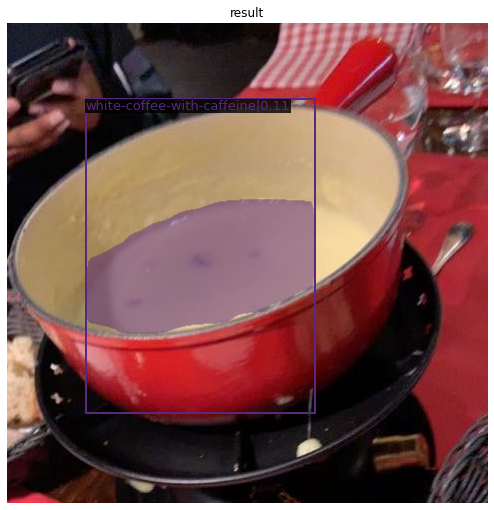

In [ ]:
#Lets visualize some results
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab

def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result_pyplot, init_detector


score_thr = 0.1 #decrease the threshold if you feel like you are missing some predictions


# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results
img = '/content/data/val/images/008082.jpg'   #you can change this to any image you want!

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.1, title='result', wait_time=0)

## Create categories files for correct annotations during inference

In [ ]:

import json, os
annotation_path = os.path.join("data", "train/annotations.json")
json_file = open(annotation_path)
coco = json.load(json_file)

with open("classes.json",'w') as f:
    json.dump(coco["categories"],f)

## Copy the config file and trained model

In [ ]:
#copy the trained model and config file to home directory
%cp /content/drive/MyDrive/log_mmdet/htc_without_semantic_r50_fpn_1x_coco.py /content/htc_without_semantic_r50_fpn_1x_coco.py
%cp /content/drive/MyDrive/log_mmdet/latest.pth /content/latest.pth


# Quick Submission 💪

## Inference on the public test set
*   loading the model config and setting up related paths
*   running inference and generating json file for submission



In [ ]:
#@title Inference code from myfood exp repo, Used for quick submission
%%writefile inference_mmdet.py
'''
@Author: Gaurav Singhal
@Description: Standalone file for testing and evaluating
the models. It doesn't do any post-processing or ensembling.
'''

import argparse
import os
import warnings
import glob
import json
import mmcv
import torch
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)
from mmdet.apis import init_detector, inference_detector

from mmdet.apis import multi_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
# import aicrowd_helpers
import os.path as osp
import traceback
import pickle
import shutil
import tempfile
import time
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmdet.core import encode_mask_results

import uuid

# TEST_IMAGES_PATH = "/mnt/public/xxx/imrec/data/val/images"

def create_test_predictions(images_path):
    test_predictions_file = tempfile.NamedTemporaryFile(mode="w+", suffix=".json")

    annotations = {'categories': [], 'info': {}, 'images': []}
    for item in glob.glob(images_path+'/*.jpg'):
        image_dict = dict()
        img = mmcv.imread(item)
        height,width,__ = img.shape
        id = int(os.path.basename(item).split('.')[0])
        image_dict['id'] = id
        image_dict['file_name'] = os.path.basename(item)
        image_dict['width'] = width
        image_dict['height'] = height
        annotations['images'].append(image_dict)
    annotations['categories'] = json.loads(open("classes.json").read())
    json.dump(annotations, open(test_predictions_file.name, 'w'))

    return test_predictions_file

def single_gpu_test(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):

    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        # aicrowd_helpers.execution_progress({"image_ids" : [i]})
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                img_tensor = data['img'][0].data[0]
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr)

        # Perform RLE encode for masks
        if isinstance(result[0], tuple):
            result = [(bbox_results, encode_mask_results(mask_results))
                      for bbox_results, mask_results in result]
        results.extend(result)

        for _ in range(batch_size):
            prog_bar.update()
    return results

def parse_args():
    parser = argparse.ArgumentParser(
        description='MMDet test (and eval) a model')
    parser.add_argument('--config', help='test config file path')
    parser.add_argument('--checkpoint', help='checkpoint file')
    parser.add_argument('--data', help='test data folder path')
    parser.add_argument('--out', help='output result file in pickle format')
    parser.add_argument(
        '--fuse-conv-bn',
        action='store_true',
        help='Whether to fuse conv and bn, this will slightly increase'
        'the inference speed')
    parser.add_argument(
        '--format-only',
        action='store_true',
        help='Format the output results without perform evaluation. It is'
        'useful when you want to format the result to a specific format and '
        'submit it to the test server')
    parser.add_argument(
        '--eval',
        type=str,
        nargs='+',
        help='evaluation metrics, which depends on the dataset, e.g., "bbox",'
        ' "segm", "proposal" for COCO, and "mAP", "recall" for PASCAL VOC')
    parser.add_argument('--show', action='store_true', help='show results')
    parser.add_argument(
        '--show-dir', help='directory where painted images will be saved')
    parser.add_argument(
        '--show-score-thr',
        type=float,
        default=0.3,
        help='score threshold (default: 0.3)')
    parser.add_argument(
        '--gpu-collect',
        action='store_true',
        help='whether to use gpu to collect results.')
    parser.add_argument(
        '--tmpdir',
        help='tmp directory used for collecting results from multiple '
        'workers, available when gpu-collect is not specified')
    parser.add_argument(
        '--cfg-options',
        nargs='+',
        action=DictAction,
        help='override some settings in the used config, the key-value pair '
        'in xxx=yyy format will be merged into config file.')
    parser.add_argument(
        '--options',
        nargs='+',
        action=DictAction,
        help='custom options for evaluation, the key-value pair in xxx=yyy '
        'format will be kwargs for dataset.evaluate() function (deprecate), '
        'change to --eval-options instead.')
    parser.add_argument(
        '--eval-options',
        nargs='+',
        action=DictAction,
        help='custom options for evaluation, the key-value pair in xxx=yyy '
        'format will be kwargs for dataset.evaluate() function')
    parser.add_argument(
        '--launcher',
        choices=['none', 'pytorch', 'slurm', 'mpi'],
        default='none',
        help='job launcher')
    parser.add_argument('--out_file', help='output result file')
    parser.add_argument('--local_rank', type=int, default=0)
    parser.add_argument('--type', type=str, choices=['val', 'test'], default='test')
    parser.add_argument('--reduce_ms', action='store_true',
        help='Whether to reduce the multi-scale aug')
    args = parser.parse_args()

    if 'LOCAL_RANK' not in os.environ:
        os.environ['LOCAL_RANK'] = str(args.local_rank)

    if args.options and args.eval_options:
        raise ValueError(
            '--options and --eval-options cannot be both '
            'specified, --options is deprecated in favor of --eval-options')
    if args.options:
        warnings.warn('--options is deprecated in favor of --eval-options')
        args.eval_options = args.options
    return args

def reduce_multiscale_TTA(cfg):
    '''
    Keep only 1st and last image sizes from Multi-Scale TTA

    @input
    cfg -> Configuration file
    '''

    scale = cfg.data.test.pipeline[1]['img_scale']
    if len(scale) > 2:
        new_scale = [scale[0], scale[-1]]
        cfg.data.test.pipeline[1]['img_scale'] = new_scale
    return cfg

def main():
    ########################################################################
    # Register Prediction Start
    ########################################################################

    # aicrowd_helpers.execution_start()
    args = parse_args()
    data_folder = args.data
    # Create annotations if not already created
    test_predictions_file = create_test_predictions(data_folder)

    # Load annotations
    with open(test_predictions_file.name) as f:
        annotations = json.loads(f.read())

    assert args.out or args.eval or args.format_only or args.show \
        or args.show_dir, \
        ('Please specify at least one operation (save/eval/format/show the '
         'results / save the results) with the argument "--out", "--eval"'
         ', "--format-only", "--show" or "--show-dir"')

    if args.eval and args.format_only:
        raise ValueError('--eval and --format_only cannot be both specified')

    if args.out is not None and not args.out.endswith(('.pkl', '.pickle')):
        raise ValueError('The output file must be a pkl file.')

    cfg = Config.fromfile(args.config)
    if args.cfg_options is not None:
        cfg.merge_from_dict(args.cfg_options)

    JSONFILE_PREFIX="predictions_{}".format(str(uuid.uuid4()))
    # import modules present in list of strings.
    if cfg.get('custom_imports', None):
        from mmcv.utils import import_modules_from_strings
        import_modules_from_strings(**cfg['custom_imports'])

    # set cudnn_benchmark
    if cfg.get('cudnn_benchmark', False):
        torch.backends.cudnn.benchmark = True

    cfg.data.samples_per_gpu = 1
    cfg.data.workers_per_gpu = 2
    cfg.model.pretrained = None
    cfg.data.test.test_mode = True
    cfg.data.test.ann_file = test_predictions_file.name
    cfg.data.test.img_prefix = data_folder

    if cfg.model.get('neck'):
        if isinstance(cfg.model.neck, list):
            for neck_cfg in cfg.model.neck:
                if neck_cfg.get('rfp_backbone'):
                    if neck_cfg.rfp_backbone.get('pretrained'):
                        neck_cfg.rfp_backbone.pretrained = None
        elif cfg.model.neck.get('rfp_backbone'):
            if cfg.model.neck.rfp_backbone.get('pretrained'):
                cfg.model.neck.rfp_backbone.pretrained = None

    # in case the test dataset is concatenated
    if isinstance(cfg.data.test, dict):
        cfg.data.test.test_mode = True
    elif isinstance(cfg.data.test, list):
        for ds_cfg in cfg.data.test:
            ds_cfg.test_mode = True

    cfg.data.test.ann_file = test_predictions_file.name
    cfg.data.test.img_prefix = data_folder

    # if args.reduce_ms:
    #     print("Reduce multi-scale TTA")
    #     cfg = reduce_multiscale_tta(cfg)
    #     print(cfg.data.test.pipeline[1]['img_scale'])

    if args.launcher == 'none':
        distributed = False
    else:
        distributed = True
        init_dist(args.launcher, **cfg.dist_params)

    # build the dataloader
    samples_per_gpu = cfg.data.test.pop('samples_per_gpu', 1)
    if samples_per_gpu > 1:
        # Replace 'ImageToTensor' to 'DefaultFormatBundle'
        cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
    dataset = build_dataset(cfg.data.test)
    print(dataset)
    dataset.cat_ids = [category["id"] for category in annotations["categories"]]
    data_loader = build_dataloader(
        dataset,
        samples_per_gpu=1,
        workers_per_gpu=2,
        dist=distributed,
        shuffle=False)

    # build the model and load checkpoint
    # model = build_detector(cfg.model, train_cfg=None, test_cfg=cfg.model.test_cfg)
    model = init_detector(args.config,args.checkpoint,device='cuda:0')

    fp16_cfg = cfg.get('fp16', None)
    if fp16_cfg is not None:
        wrap_fp16_model(model)
    # checkpoint = load_checkpoint(model, args.checkpoint, map_location='cuda')
    if args.fuse_conv_bn:
        model = fuse_conv_bn(model)

    model.CLASSES = [category['name'] for category in annotations['categories']]
    # if 'CLASSES' in checkpoint['meta']:
        # model.CLASSES = checkpoint['meta']['CLASSES']
    # else:
        # model.CLASSES = dataset.CLASSES

    if not distributed:
        model = MMDataParallel(model, device_ids=[0])
        outputs = single_gpu_test(model, data_loader, args.show, args.show_dir,
                                  args.show_score_thr)
    else:
        model = MMDistributedDataParallel(
            model.cuda(),
            device_ids=[torch.cuda.current_device()],
            broadcast_buffers=False)
        outputs = multi_gpu_test(model, data_loader, args.tmpdir,
                                 args.gpu_collect)

    rank, _ = get_dist_info()
    if rank == 0:
        if args.out:
            print(f'\nwriting results to {args.out}')
            mmcv.dump(outputs, args.out)
        kwargs = {} if args.eval_options is None else args.eval_options
        if args.format_only:
            dataset.format_results(outputs, **kwargs)
        if args.eval:
            eval_kwargs = cfg.get('evaluation', {}).copy()
            for key in ['interval', 'tmpdir', 'start', 'gpu_collect']:
                eval_kwargs.pop(key, None)
            eval_kwargs.update(dict(metric=args.eval, **kwargs))
            print(dataset.evaluate(outputs, **eval_kwargs))

    # consolidate_results(["predictions.segm.json"], 'test_predictions.json', args.out_file)
    ########################################################################
    # Register Prediction Complete
    ########################################################################
    # aicrowd_helpers.execution_success({
    #     "predictions_output_path" : args.out_file
    # })
    print("\nAICrowd register complete")
    # preds = []
    # with open("predictions.segm.json", "r") as pred_file:
    #     preds.extend(json.loads(pred_file.read()))
    # print(preds)
    JSONFILE_PREFIX = args.eval_options['jsonfile_prefix']
    shutil.move("{}.segm.json".format(JSONFILE_PREFIX), args.out_file)
    os.remove("{}.bbox.json".format(JSONFILE_PREFIX))

if __name__ == '__main__':
    try:
        main()
    except Exception as e:
        error = traceback.format_exc()
        print(error)


Writing inference_mmdet.py


In [ ]:
#setting the paths for images and output file
test_images_dir="/content/data/test/images"
output_filepath="/content/predictions_mmdetection.json"

#path of trained model & config
model_path="/content/latest.pth"
config_file="/content/htc_without_semantic_r50_fpn_1x_coco.py"

In [ ]:
!python inference_mmdet.py --config $config_file --checkpoint $model_path \
--data $test_images_dir \
--format-only --eval-options "jsonfile_prefix=preds" --out_file $output_filepath

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

CocoDataset Test dataset with number of images 3000, and instance counts: 
+----------------------------------------------------------------------+-------+--------------------------------------------------------------------------------+-------+-------------------------------------------------------------------------------+-------+------------------------------------------------------------------------+-------+-----------------------------------------------------------------+-------+
| category                                                             | count | category                                                                       | count | category                                                                      | count | category                                                               | count | category                                                        | count |
+--------------

Now that the prediction file is generated for public test set, To make quick submission:
* Use AIcrowd CLL `aicrowd submit` command to do a quick submission. </br>

**Alternatively:**
* download the `predictions_mmdetection.json` file by running below cell
* visit the [create submission page](https://www.aicrowd.com/challenges/food-recognition-benchmark-2022/submissions/new)
* Upload the `predictions_mmdetection.json` file
* Voila!! You just made your first submission!


In [ ]:
#use aicrowd CLI to make quick submission
!aicrowd submission create -c food-recognition-benchmark-2022 -f $output_filepath

#Active submission 🤩

Step 0 : Fork the baseline to make your own changes to it. Go to settings and make the repo private.


Step 1 : For first time setup, Setting up SSH to login to Gitlab.

  0. Run the next cell to check if you already have SSH keys in your drive, if yes, skip this step.
  1. Run `ssh-keygen -t ecdsa -b 521`
  2. Run `cat ~./ssh/id_ecdsa.pub` and copy the output
  3. Go to [Gitlab SSH Keys](https://gitlab.aicrowd.com/profile/keys) and then paste the output inside the key and use whaever title you like.


Step 2: Clone your forked Repo & Add Models & Push Changes

  1. Run `git clone git@gitlab.aicrowd.com:[Your Username]/mmdetection-starter-food-2022.git`
  2. Put your model inside the models directioary and then run `git-lfs track "*.pth"`
  3. Run `git add .` then `git commit -m " adding model"`
  3. Run `git push origin master`

Step 3. Create Submission

  1. Go to the repo and then tags and then New Tag.
  2. In the tag name,you can use `submission_v1`, ( Everytime you make a new submission, just increase the no. like - `submission_v2`,  `submission_v3` )
  3. A new issue will be created with showing the process. Enjoy!




If you do not have SSH Keys, Check this [Page](https://docs.gitlab.com/ee/ssh/index.html#generate-an-ssh-key-pair)

Add your SSH Keys to your GitLab account by following the instructions here

In [ ]:
%%bash
SSH_PRIV_KEY=/content/drive/MyDrive/id_ecdsa
SSH_PUB_KEY=/content/drive/MyDrive/id_ecdsa.pub
if [ -f "$SSH_PRIV_KEY" ]; then
    echo "SSH Key found! ✅\n"
    mkdir -p /root/.ssh
    cp /content/drive/MyDrive/id_ecdsa ~/.ssh/id_ecdsa
    cp /content/drive/MyDrive/id_ecdsa.pub ~/.ssh/id_ecdsa.pub
    echo "SSH key successfully copied to local!"
else
    echo "SSH Key does not exist."
    ssh-keygen -t ecdsa -b521 -f ~/.ssh/id_ecdsa
    cat ~/.ssh/id_ecdsa.pub
    echo "❗️Please open https://gitlab.aicrowd.com/profile/keys and copy-paste the above text in the **key** textbox."
    cp  ~/.ssh/id_ecdsa /content/drive/MyDrive/id_ecdsa
    cp  ~/.ssh/id_ecdsa.pub /content/drive/MyDrive/id_ecdsa.pub
    echo "SSH key successfully created and copied to drive!"
fi

SSH Key found! ✅\n
SSH key successfully copied to local!


In [ ]:
import IPython

html = "<b>Copy paste below SSH key in your GitLab account here (one time):</b><br/>"
html += '<a href="https://gitlab.aicrowd.com/-/profile/keys" target="_blank">https://gitlab.aicrowd.com/-/profile/keys</a><br><br>'

public_key = open("/content/drive/MyDrive/id_ecdsa.pub").read()
html += '<br/><textarea>'+public_key+'</textarea><button onclick="navigator.clipboard.writeText(\''+public_key.strip()+'\');this.innerHTML=\'Copied ✅\'">Click to copy</button>'
IPython.display.HTML(html)

Clone the gitlab starter repo and add submission files

In [ ]:
# Set your AIcrowd username for action submission.
# This username will store repository and used for submitter's username, etc
username = "jerome_patel"
!echo -n {username} > author.txt

In [ ]:
%%bash
username=$(cat author.txt)
echo "Username $username"

git config --global user.name "$username"
git config --global user.email "$username@noreply.gitlab.aicrowd.com"

touch ${HOME}/.ssh/known_hosts
ssh-keyscan -H gitlab.aicrowd.com >> ${HOME}/.ssh/known_hosts 2> /dev/null


apt install -qq -y jq git-lfs &> /dev/null

git lfs install
cd /content/

echo "Checking if repository already exist, otherwise create one"
export SUBMISSION_REPO="git@gitlab.aicrowd.com:$username/mmdetection-starter-food-2022.git"
echo "cloning the $SUBMISSION_REPO"
git clone $SUBMISSION_REPO mmdetection-starter-food-2022
ALREADYEXIST=$?

if [ $ALREADYEXIST -ne 0 ]; then
  echo "Project didn't exist, forking from upstream"
  git clone https://github.com/AIcrowd/food-recognition-benchmark-starter-kit.git mmdetection-starter-food-2022
fi

cd /content/mmdetection-starter-food-2022
git remote remove origin
git remote add origin "$SUBMISSION_REPO"

Username jerome_patel
Git LFS initialized.
Checking if repository already exist, otherwise create one
cloning the git@gitlab.aicrowd.com:jerome_patel/mmdetection-starter-food-2022.git


Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Cloning into 'mmdetection-starter-food-2022'...


## To make active submission:
* Required Files are `aicrowd.json, apt.txt, requirements.txt, predict.py` (already configured for mmdetection)
* **[IMP]** Copy mmdetection trained model, corresponding config file to repo
* for inference place these files : `predict_mmdetection.py mmdet_inference.py` (already present in repo)
* Modify requirements.txt and `predict.py` for mmdetection
* **[IMP]** Modify `aicrowd.json` for your submission

**Note:** You only need to place your trained model and modify aicrowd.json to create your first easy submission.

In [ ]:
#@title Modify mmdet_inference.py (modify and run only if you want to change the inference)
%%writefile /content/mmdetection-starter-food-2022/utils/mmdet_inference.py

import mmcv
import numpy as np
import torch
from mmcv.ops import RoIPool
from mmcv.parallel import collate, scatter
from mmcv.runner import load_checkpoint

from mmdet.core import get_classes
from mmdet.datasets import replace_ImageToTensor
from mmdet.datasets.pipelines import Compose
from mmdet.models import build_detector
# import time


def inference(model, imgs):

    # start = time.process_time()
    imgs = [imgs]
    cfg = model.cfg
    device = 'cuda:0'
    if isinstance(imgs[0], np.ndarray):
        cfg = cfg.copy()
        # set loading pipeline type
        cfg.data.test.pipeline[0].type = 'LoadImageFromWebcam'

    cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
    test_pipeline = Compose(cfg.data.test.pipeline)

    datas = []
    data = dict(img_info=dict(filename=imgs[0]), img_prefix=None)
    # build the data pipeline
    data = test_pipeline(data)
    datas.append(data)

    data = collate(datas, samples_per_gpu=len(imgs))
    # just get the actual data from DataContainer
    data['img_metas'] = [img_metas.data[0] for img_metas in data['img_metas']]
    data['img'] = [img.data[0] for img in data['img']]
    # scatter to specified GPU
    data = scatter(data, [device])[0]

    # forward the model
    with torch.no_grad():
        results = model(return_loss=False, rescale=True, **data)
    # your code here
    # print(time.process_time() - start)
    return results[0]



Overwriting /content/mmdetection-starter-food-2022/utils/mmdet_inference.py


In [ ]:
#@title Modify predict_mmdetection.py (modify & run this only if you want to change inference code part)
%%writefile /content/mmdetection-starter-food-2022/predict_mmdetection.py

import os
import json
import glob
from PIL import Image
import importlib
import numpy as np
import cv2
import torch
import traceback
import pickle
import shutil
import glob
import tempfile
import time
import mmcv
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmdet.core import encode_mask_results
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)
from mmdet.apis import init_detector, inference_detector

from mmdet.apis import multi_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
import pycocotools.mask as mask_util

from utils.mmdet_inference import inference
from evaluator.food_challenge import FoodChallengePredictor


"""
Expected ENVIRONMENT Variables
* AICROWD_TEST_IMAGES_PATH : abs path to  folder containing all the test images
* AICROWD_PREDICTIONS_OUTPUT_PATH : path where you are supposed to write the output predictions.json
"""

class MMDetectionPredictor(FoodChallengePredictor):

    """
    PARTICIPANT_TODO:
    You can do any preprocessing required for your codebase here like loading up models into memory, etc.
    """
    def prediction_setup(self):
        # self.PADDING = 50
        # self.SEGMENTATION_LENGTH = 10
        # self.MAX_NUMBER_OF_ANNOTATIONS = 10

        #set the config parameters, including the architecture which was previously used
        self.cfg_name, self.checkpoint_name = self.get_mmdetection_config()
        self.cfg = Config.fromfile(self.cfg_name)
        # self.test_img_path = os.getenv("AICROWD_TEST_IMAGES_PATH", os.getcwd() + "/data/images/")
        self.test_predictions_file = self.create_test_predictions(self.test_data_path)

        if self.cfg.get('cudnn_benchmark', False):
            torch.backends.cudnn.benchmark = True
        self.cfg.data.samples_per_gpu = 1
        self.cfg.data.workers_per_gpu = 2
        self.cfg.model.pretrained = None
        self.cfg.data.test.test_mode = True
        self.cfg.data.test.ann_file = self.test_predictions_file.name
        self.cfg.data.test.img_prefix = self.test_data_path

        self.model = init_detector(self.cfg_name,self.checkpoint_name,device='cuda:0')

        fp16_cfg = self.cfg.get('fp16', None)
        if fp16_cfg is not None:
            wrap_fp16_model(self.model)

         # Load annotations
        with open(self.test_predictions_file.name) as f:
            self.annotations = json.loads(f.read())
        self.cat_ids = [category["id"] for category in self.annotations["categories"]]

        self.model.CLASSES = [category['name'] for category in self.annotations['categories']]

    """
    PARTICIPANT_TODO:
    During the evaluation all image file path will be provided one by one.
    NOTE: In case you want to load your model, please do so in `predict_setup` function.
    """
    def prediction(self, image_path):
        print("Generating for", image_path)
        # read the image
        result = inference(self.model, image_path)
        #RLE Encode the masks
        result = (result[0], encode_mask_results(result[1]))
        result = self.segm2jsonformat(result,image_path)
        return result

    def xyxy2xywh(self,bbox):
        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0] + 1,
            _bbox[3] - _bbox[1] + 1,
        ]

    def segm2jsonformat(self, result,image_path):
        segm_json_results = []
        img_id = int(os.path.basename(image_path).split(".")[0])
        det, seg = result
        # print("image:",img_id)
        for label in range(len(det)):
                bboxes = det[label]
                #print(type(bboxes))
                segms = seg[label]
                mask_score = [bbox[4] for bbox in bboxes]
                for i in range(len(bboxes)):
                        data = dict()
                        data['image_id'] = img_id
                        data['bbox'] = self.xyxy2xywh(bboxes[i])
                        data['score'] = float(mask_score[i])
                        data['category_id'] = self.cat_ids[label]
                        if isinstance(segms[i]['counts'], bytes):
                                segms[i]['counts'] = segms[i]['counts'].decode()
                        data['segmentation'] = segms[i]
                        segm_json_results.append(data)
        return segm_json_results


    def create_test_predictions(self,images_path):
        test_predictions_file = tempfile.NamedTemporaryFile(mode="w+", suffix=".json")
        annotations = {'categories': [], 'info': {}, 'images': []}
        for item in glob.glob(images_path+'/*.jpg'):
            image_dict = dict()
            img = mmcv.imread(item)
            height,width,__ = img.shape
            id = int(os.path.basename(item).split('.')[0])
            image_dict['image_id'] = id
            image_dict['file_name'] = os.path.basename(item)
            image_dict['width'] = width
            image_dict['height'] = height
            annotations['images'].append(image_dict)
        annotations['categories'] = json.loads(open("classes.json").read())
        json.dump(annotations, open(test_predictions_file.name, 'w'))

        return test_predictions_file

    def get_mmdetection_config(self):
        with open('aicrowd.json') as f:
            content = json.load(f)
            config_fname = content['model_config_file']
            checkpoint_fname = content['model_path']
        # config = Config.fromfile(config_fname)
        return (config_fname, checkpoint_fname)


if __name__ == "__main__":
    submission = MMDetectionPredictor()
    submission.run()
    print("Successfully generated predictions!")


Overwriting /content/mmdetection-starter-food-2022/predict_mmdetection.py


In [ ]:
MODEL_ARCH = "htc_without_semantic_r50_fpn_1x_coco.py"
aicrowd_json = {
  "challenge_id" : "food-recognition-benchmark-2022",
  "authors" : ["jerome_patel"],
  "description" : "Food Recognition Benchmark 2022 Submission mmdetection",
  "license" : "MIT",
  "gpu": True,
  "debug": False,
  "model_path": "models/latest.pth",
  "model_type": "mmdetection",
  "model_config_file": "models/" + MODEL_ARCH
}
import json
with open('/content/mmdetection-starter-food-2022/aicrowd.json', 'w') as fp:
  fp.write(json.dumps(aicrowd_json, indent=4))

### Copy required files (trained model, config, classes.json) to mmdetection repo

In [ ]:
!mkdir -p /content/mmdetection-starter-food-2022/models
!cp /content/classes.json /content/mmdetection-starter-food-2022/utils/classes.json
!cp /content/latest.pth /content/mmdetection-starter-food-2022/models/latest.pth
!cp $MODEL_ARCH /content/mmdetection-starter-food-2022/models/$MODEL_ARCH

### Finally push the repo for active submission

In [ ]:
%%bash

## Set your unique tag for this submission (no spaces), example:
# export MSG="v1"
# export MSG="v2" ...
# or something more informative...
export MSG="mmdetection_submission_v0_1"

username=$(cat author.txt)
echo "Username $username"


cd /content/mmdetection-starter-food-2022
git lfs track "*.pth"
git add .gitattributes
git add --all
git commit -m "$MSG" || true

find . -type f -size +5M -exec git lfs migrate import --include={} &> /dev/null \;

git tag -am "submission_$MSG" "submission_$MSG"
git config lfs.https://gitlab.aicrowd.com/$username/mmdetection-starter-food-2022.git/info/lfs.locksverify false

git remote remove origin
git remote add origin git@gitlab.aicrowd.com:$username/mmdetection-starter-food-2022.git

git lfs push origin master
git push origin master
git push origin "submission_$MSG"

echo "Track your submission status here: https://gitlab.aicrowd.com/$username/mmdetection-starter-food-2022/issues"

Username jerome_patel
"*.pth" already supported
On branch master
nothing to commit, working tree clean
Git LFS: (0 of 0 files, 3 skipped) 0 B / 0 B, 1.26 GB skipped                  Track your submission status here: https://gitlab.aicrowd.com/jerome_patel/mmdetection-starter-food-2022/issues


fatal: tag 'submission_mmdetection_submission_v0_1' already exists
Everything up-to-date
Everything up-to-date


## Local Evaluation for Active Submission Repo

In [ ]:
%%bash
cd /content/mmdetection-starter-food-2022

export TEST_DATASET_PATH=../data/test/images
export RESULTS_DATASET_PATH=../data
./run.sh